In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('backlight.jpg')
rgb = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)

In [3]:
baris, kolom = img.shape[:2]

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [5]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.09, minNeighbors=3)

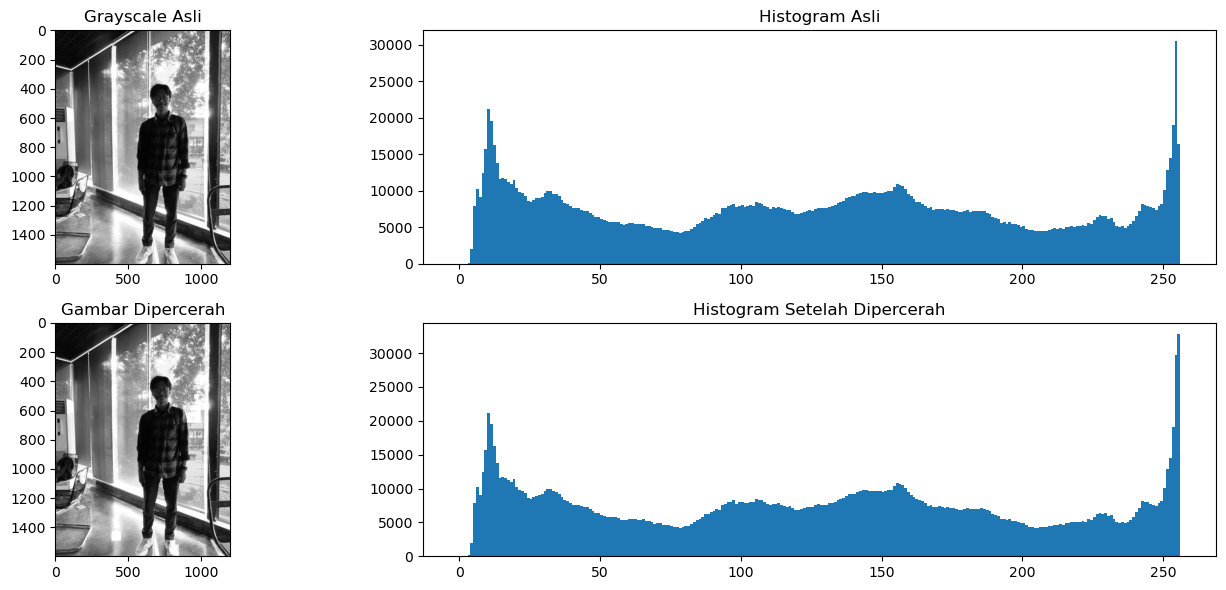

In [6]:
citra_cerah = gray.copy()
beta = 70

# Loop hanya pada area wajah
for (x, y, w, h) in faces:
    for i in range(y, y+h):
        for j in range(x, x+w):
            gyx = gray[i, j] + beta
            citra_cerah[i, j] = min(255, gyx)

citra_cerah = citra_cerah.astype(np.uint8)

# Visualisasi hasil
fig, axs = plt.subplots(2, 2, figsize=(15, 6))

axs[0, 0].imshow(gray, cmap='gray')
axs[0, 0].set_title("Grayscale Asli")
axs[0, 1].hist(gray.ravel(), 256, [0, 256])
axs[0, 1].set_title("Histogram Asli")

axs[1, 0].imshow(citra_cerah, cmap='gray')
axs[1, 0].set_title("Gambar Dipercerah")
axs[1, 1].hist(citra_cerah.ravel(), 256, [0, 256])
axs[1, 1].set_title("Histogram Setelah Dipercerah")

plt.tight_layout()
plt.show()

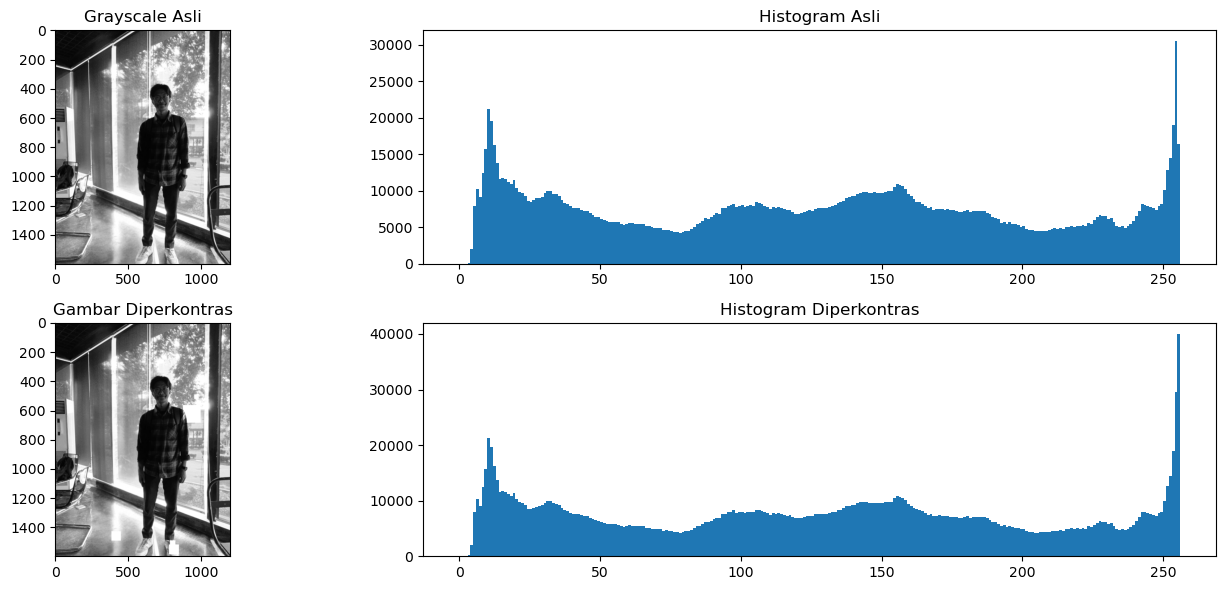

In [7]:
citra_kontras = gray.copy()
alpha = 2.5

for (x, y, w, h) in faces:
    for i in range(y, y+h):
        for j in range(x, x+w):
            gxy = gray[i, j] * alpha
            citra_kontras[i, j] = min(255, int(gxy))

citra_kontras = citra_kontras.astype(np.uint8)

# Tampilkan hasil
fig, axs = plt.subplots(2, 2, figsize=(15, 6))

axs[0, 0].imshow(gray, cmap='gray')
axs[0, 0].set_title("Grayscale Asli")
axs[0, 1].hist(gray.ravel(), 256, [0, 256])
axs[0, 1].set_title("Histogram Asli")

axs[1, 0].imshow(citra_kontras, cmap='gray')
axs[1, 0].set_title("Gambar Diperkontras")
axs[1, 1].hist(citra_kontras.ravel(), 256, [0, 256])
axs[1, 1].set_title("Histogram Diperkontras")

plt.tight_layout()
plt.show()

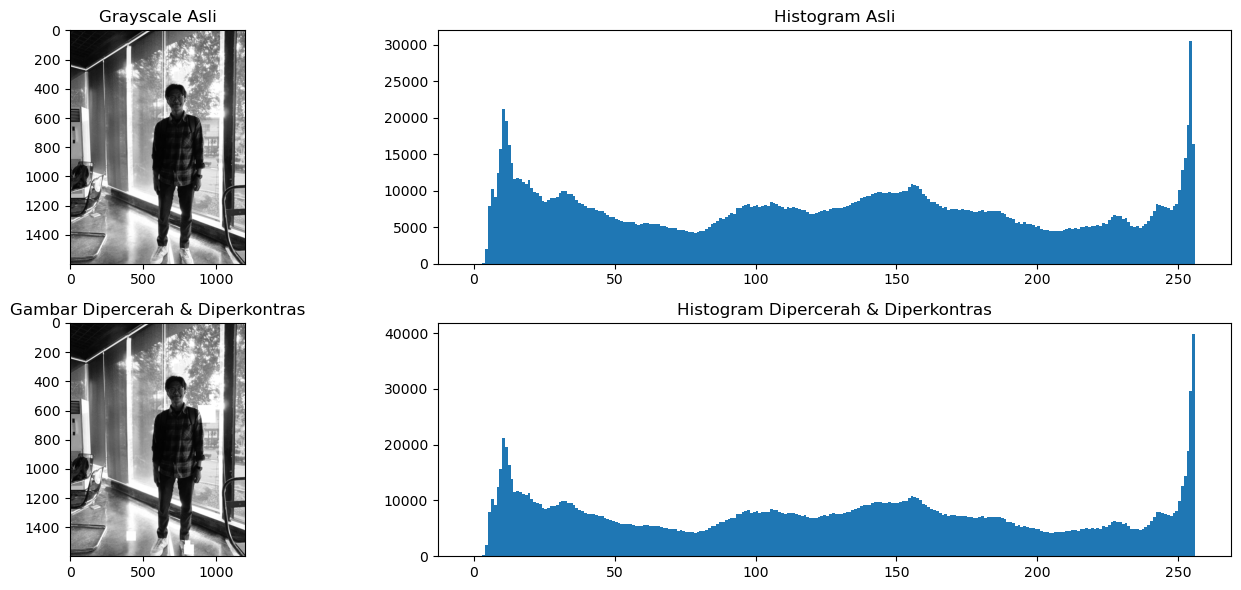

In [8]:
citra_hasil = gray.copy().astype(np.float32)

alpha = 2.0
beta = 30

# Terapkan hanya pada wajah
for (x, y, w, h) in faces:
    for i in range(y, y+h):
        for j in range(x, x+w):
            gxy = alpha * gray[i, j] + beta
            citra_hasil[i, j] = min(255, gxy)

citra_hasil = citra_hasil.astype(np.uint8)

fig, axs = plt.subplots(2, 2, figsize=(15, 6))
axs[0, 0].imshow(gray, cmap='gray')
axs[0, 0].set_title("Grayscale Asli")
axs[0, 1].hist(gray.ravel(), 256, [0, 256])
axs[0, 1].set_title("Histogram Asli")

axs[1, 0].imshow(citra_hasil, cmap='gray')
axs[1, 0].set_title("Gambar Dipercerah & Diperkontras")
axs[1, 1].hist(citra_hasil.ravel(), 256, [0, 256])
axs[1, 1].set_title("Histogram Dipercerah & Diperkontras")

plt.tight_layout()
plt.show()

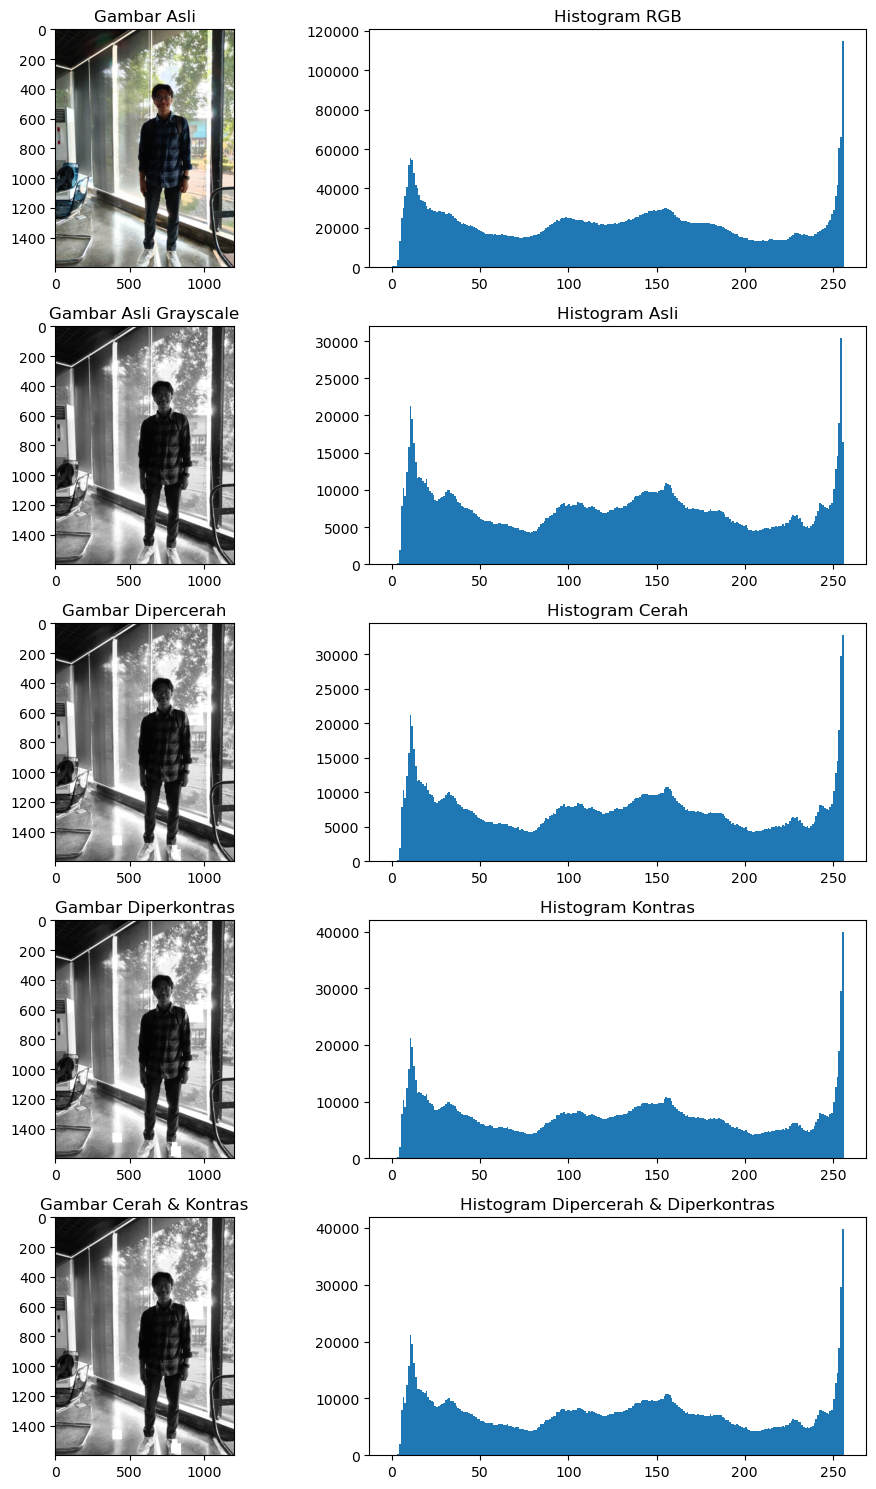

In [9]:
# Visualisasi seluruh hasil
fig, axs = plt.subplots(5, 2, figsize=(10, 15))

axs[0, 0].imshow(rgb)
axs[0, 0].set_title("Gambar Asli")
axs[0, 1].hist(rgb.ravel(), 256, [0, 256])
axs[0, 1].set_title("Histogram RGB")

axs[1, 0].imshow(gray, cmap='gray')
axs[1, 0].set_title("Gambar Asli Grayscale")
axs[1, 1].hist(gray.ravel(), 256, [0, 256])
axs[1, 1].set_title("Histogram Asli")

axs[2, 0].imshow(citra_cerah, cmap='gray')
axs[2, 0].set_title("Gambar Dipercerah")
axs[2, 1].hist(citra_cerah.ravel(), 256, [0, 256])
axs[2, 1].set_title("Histogram Cerah")

axs[3, 0].imshow(citra_kontras, cmap='gray')
axs[3, 0].set_title("Gambar Diperkontras")
axs[3, 1].hist(citra_kontras.ravel(), 256, [0, 256])
axs[3, 1].set_title("Histogram Kontras")

axs[4, 0].imshow(citra_hasil, cmap='gray')
axs[4, 0].set_title("Gambar Cerah & Kontras")
axs[4, 1].hist(citra_hasil.ravel(), 256, [0, 256])
axs[4, 1].set_title("Histogram Dipercerah & Diperkontras")

plt.tight_layout()
plt.show()
